In [2]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [3]:
pyplot.rcParams['font.family']='serif'
pyplot.rcParams['font.size']=16

In [4]:
g = 9.81 #gravitational accrleration
vt = 4.9 #trim velocity 
CD = 1.0/5.0 #drag coefficient
CL = 1.0 #lft coefficient
# initial conditions
v0 = 6.5
theta0 = -0.1 #trajectory angle
x0 = 0.0 
y0 = 2.0

In [5]:
def rhs_phugoid(u,CL,CD,g,vt):
    v,theta,x,y=u
    
    rhs = numpy.array([-g*math.sin(theta)-CD/CL*g/vt**2*v**2,
                      -g*math.cos(theta)/v+g/vt**2*v,
                      v*math.cos(theta),
                      v*math.sin(theta)])
    return rhs

In [6]:
def euler_step(u,f,dt,*args):
    u_new = u+dt*f(u,*args)
    return u_new

In [7]:
def l1_diff(u_coarse,u_fine,dt):
    N_coarse = u_coarse.shape[0]
    N_fine = u_fine.shape[0]
    ratio = math.ceil(N_fine/N_coarse)
    diff = dt *numpy.sum(numpy.abs(u_coarse-u_fine[::ratio]))
    return diff

In [8]:
def rk2_step(u,f,dt,*args):
    u_star = u+0.5*dt*f(u,*args)
    u_new = u+dt*f(u_star,*args)
    return u_new

In [9]:
T = 15.0
dt = 0.01
N = int(T/dt)+1


u_euler = numpy.empty((N, 4))
u_rk2 = numpy.empty((N, 4))
u_euler[0] = numpy.array([v0, theta0, x0, y0])
u_rk2[0] = numpy.array([v0, theta0, x0, y0])


for n in range(N - 1):
    u_euler[n + 1] = euler_step(u_euler[n], rhs_phugoid, dt,
                                CL, CD, g, vt)
    u_rk2[n + 1] = rk2_step(u_rk2[n], rhs_phugoid, dt,
                            CL, CD, g, vt)


In [10]:
x_euler = u_euler[:, 2]
y_euler = u_euler[:, 3]
x_rk2 = u_rk2[:, 2]
y_rk2 = u_rk2[:, 3]

In [11]:
idx_negative_euler = numpy.where(y_euler < 0.0)[0]
if len(idx_negative_euler) == 0:
    idx_ground_euler = N - 1
    print('[Euler] Glider has not touched ground yet!')
else:
    idx_ground_euler = idx_negative_euler[0]
    
idx_negative_rk2 = numpy.where(y_rk2 < 0.0)[0]
if len(idx_negative_rk2) == 0:
    idx_ground_rk2 = N - 1
    print('[RK2] Glider has not touched ground yet!')
else:
    idx_ground_rk2 = idx_negative_rk2[0]

Are the x-values close? False
Are the y-values close? False
Distance traveled: 14.516


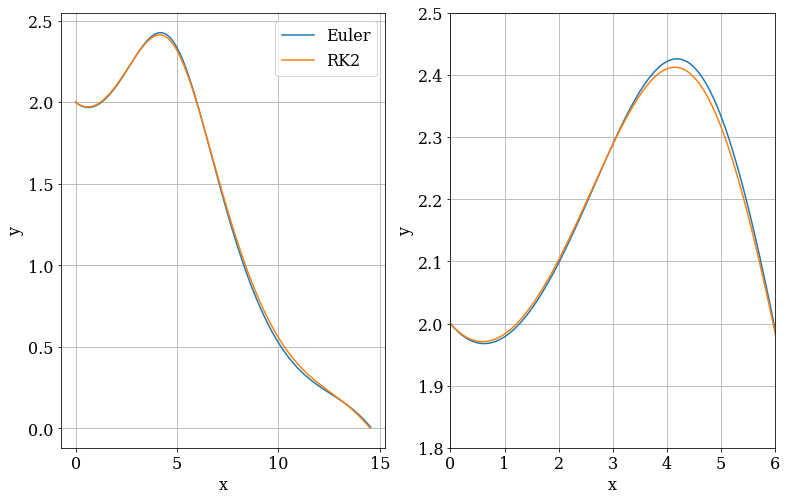

In [12]:
print('Are the x-values close? {}'.format(numpy.allclose(x_euler, x_rk2)))
print('Are the y-values close? {}'.format(numpy.allclose(y_euler, y_rk2)))
print('Distance traveled: {:.3f}'.format(x_rk2[idx_ground_rk2 - 1]))

pyplot.figure(figsize=(12.8, 8.0))
pyplot.subplot(121)
pyplot.grid()
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.plot(x_euler[:idx_ground_euler], y_euler[:idx_ground_euler],
            label='Euler')
pyplot.plot(x_rk2[:idx_ground_rk2], y_rk2[:idx_ground_rk2],
            label='RK2')
pyplot.legend();

pyplot.subplot(122)
pyplot.grid()
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.plot(x_euler, y_euler, label='Euler')
pyplot.plot(x_rk2, y_rk2, label='RK2')
pyplot.xlim(0.0, 6.0)
pyplot.ylim(1.8, 2.5);